In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\shamaun\Desktop\Datasets\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


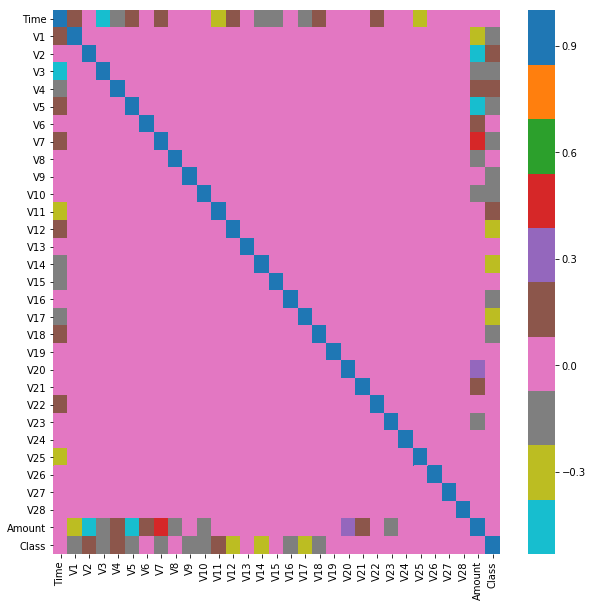

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='tab10_r',annot=False)
plt.show()

In [12]:
ip = data.drop(['Time','V6','V8','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'
                ,'Amount','Class'],axis=1)
op = data.Class

In [13]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(ip,op,test_size=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtr,ytr)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
model.score(xts,yts)

0.9992099996488887

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(xts)

In [17]:
print(confusion_matrix(yts,y_pred))

[[56861     5]
 [   40    56]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(yts,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.92      0.58      0.71        96

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.96      0.79      0.86     56962
weighted avg       1.00      1.00      1.00     56962

